In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load datasets
daily = pd.read_csv('../data/processed/data.csv')
monthly = pd.read_csv('../data/processed/monthly_data.csv')
annual = pd.read_csv('../data/processed/annual_data.csv')

daily.tail()

,time,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,block_height,halving_period
3853,2021-02-03,1187019.0,150.0,194862549.0,1.299084e+06,3.101614,6.996493e+11,2.255759e+11,2.082353e+13,0.000394,...,19375.076177,0.004400,165.350479,513281.288932,1.928828e+10,0.035095,0.055794,0.046452,668974.0,3.0
3854,2021-02-04,1226684.0,160.0,205954354.0,1.287215e+06,3.046232,6.913236e+11,2.269438e+11,2.082353e+13,0.000451,...,23180.916896,0.004726,175.487836,663431.106240,2.463267e+10,0.035119,0.054639,0.046548,669134.0,3.0
3855,2021-02-05,1257476.0,169.0,220967480.0,1.307500e+06,3.094287,7.084231e+11,2.289455e+11,2.082353e+13,0.000403,...,23057.905209,0.003946,150.114267,625265.772645,2.378849e+10,0.035133,0.053121,0.046506,669303.0,3.0
3856,2021-02-06,1147256.0,159.0,204567178.0,1.286586e+06,3.184288,7.326001e+11,2.300672e+11,2.140366e+13,0.000346,...,18788.903641,0.003745,147.334768,439000.129185,1.727102e+10,0.035184,0.051994,0.045997,669462.0,3.0
3857,2021-02-07,1159518.0,156.0,217718080.0,1.395629e+06,3.141200,7.263308e+11,2.312271e+11,2.143440e+13,0.000295,...,19424.418905,0.003062,119.422933,421592.878721,1.644339e+10,0.035020,0.051490,0.046080,669618.0,3.0


In [3]:
#We will drop some columns that use the price of bitcoin in USD to the calculate the data of that column,
#and other columns in the dataset that are just calculations of returns and volatility over a period of time.
columns_to_drop = ['BlkCnt', 'CapMVRVCur', 'CapMrktCurUSD', 'CapRealUSD', 'FeeMeanUSD', 'FeeMedUSD', 'FeeTotUSD',
                   'IssContUSD', 'IssTotUSD', 'NVTAdj', 'NVTAdj90', 'PriceBTC', 'ROI1yr', 'ROI30d', 'TxTfrValAdjUSD',
                   'TxTfrValMeanUSD', 'TxTfrValMedUSD', 'TxTfrValUSD', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d']


daily = daily.drop(columns=columns_to_drop)
monthly = monthly.drop(columns=columns_to_drop)
annual = annual.drop(columns=columns_to_drop)


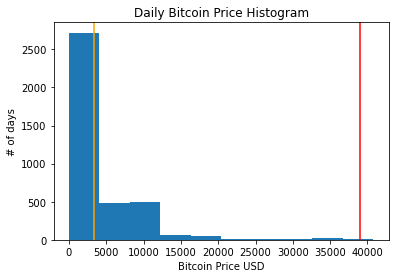

In [4]:
#The independent variable is the price of bitcoin in US$/bitcoin.
#We make a histogram of the bitcoin price to see its distribution.
btc_price_daily = daily['PriceUSD']
plt.hist(btc_price_daily, bins=10)
plt.axvline(btc_price_daily.mean(), color='orange')
plt.axvline(btc_price_daily.iloc[-1], color='red')

plt.xlabel('Bitcoin Price USD')
plt.ylabel('# of days')
plt.title('Daily Bitcoin Price Histogram')
plt.show()


#Most price observations are between $0 and $2,500
#Historical mean around $3,000 (orange line)
#However last price is $27,039 (red line)

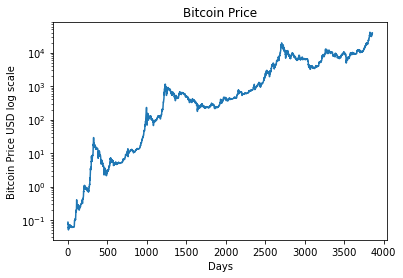

In [5]:
#Linear plot to see bitcoin's price history
plt.plot(btc_price_daily)
plt.yscale('log')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price USD log scale')
plt.title('Bitcoin Price')
plt.show()



In [6]:
btc_price_daily.describe()
#The bitcoin price has varied widely from a minimum of $.05 to a maximum of $27,039.
#Historical average price is $2,999.

count     3858.000000
mean      3336.253718
std       5428.099219
min          0.050541
25%         44.030583
50%        526.467632
75%       6339.114394
max      40775.404563
Name: PriceUSD, dtype: float64

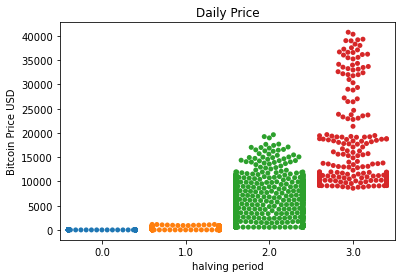

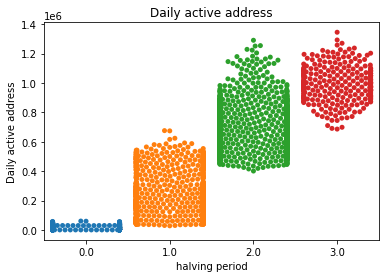

In [7]:
#swarm plot to visualize price by halving period
sns.swarmplot(x='halving_period', y='PriceUSD', data=daily)
plt.title('Daily Price')
#plt.yscale('log')
plt.xlabel('halving period')
plt.ylabel('Bitcoin Price USD')
plt.show()

sns.swarmplot(x='halving_period', y='AdrActCnt', data=daily)
plt.title('Daily active address')
#plt.yscale('log')
plt.xlabel('halving period')
plt.ylabel('Daily active address')
plt.show()


#swarm plot shows that the price has increased sharply after every halving period, when the supply growth
#of new bitcoins are cut in half according to the protocol rules. This happens every 210,000 blocks or 
#aproximately every 4 years.
#The same applies for daily active adresses, a proxy of users.

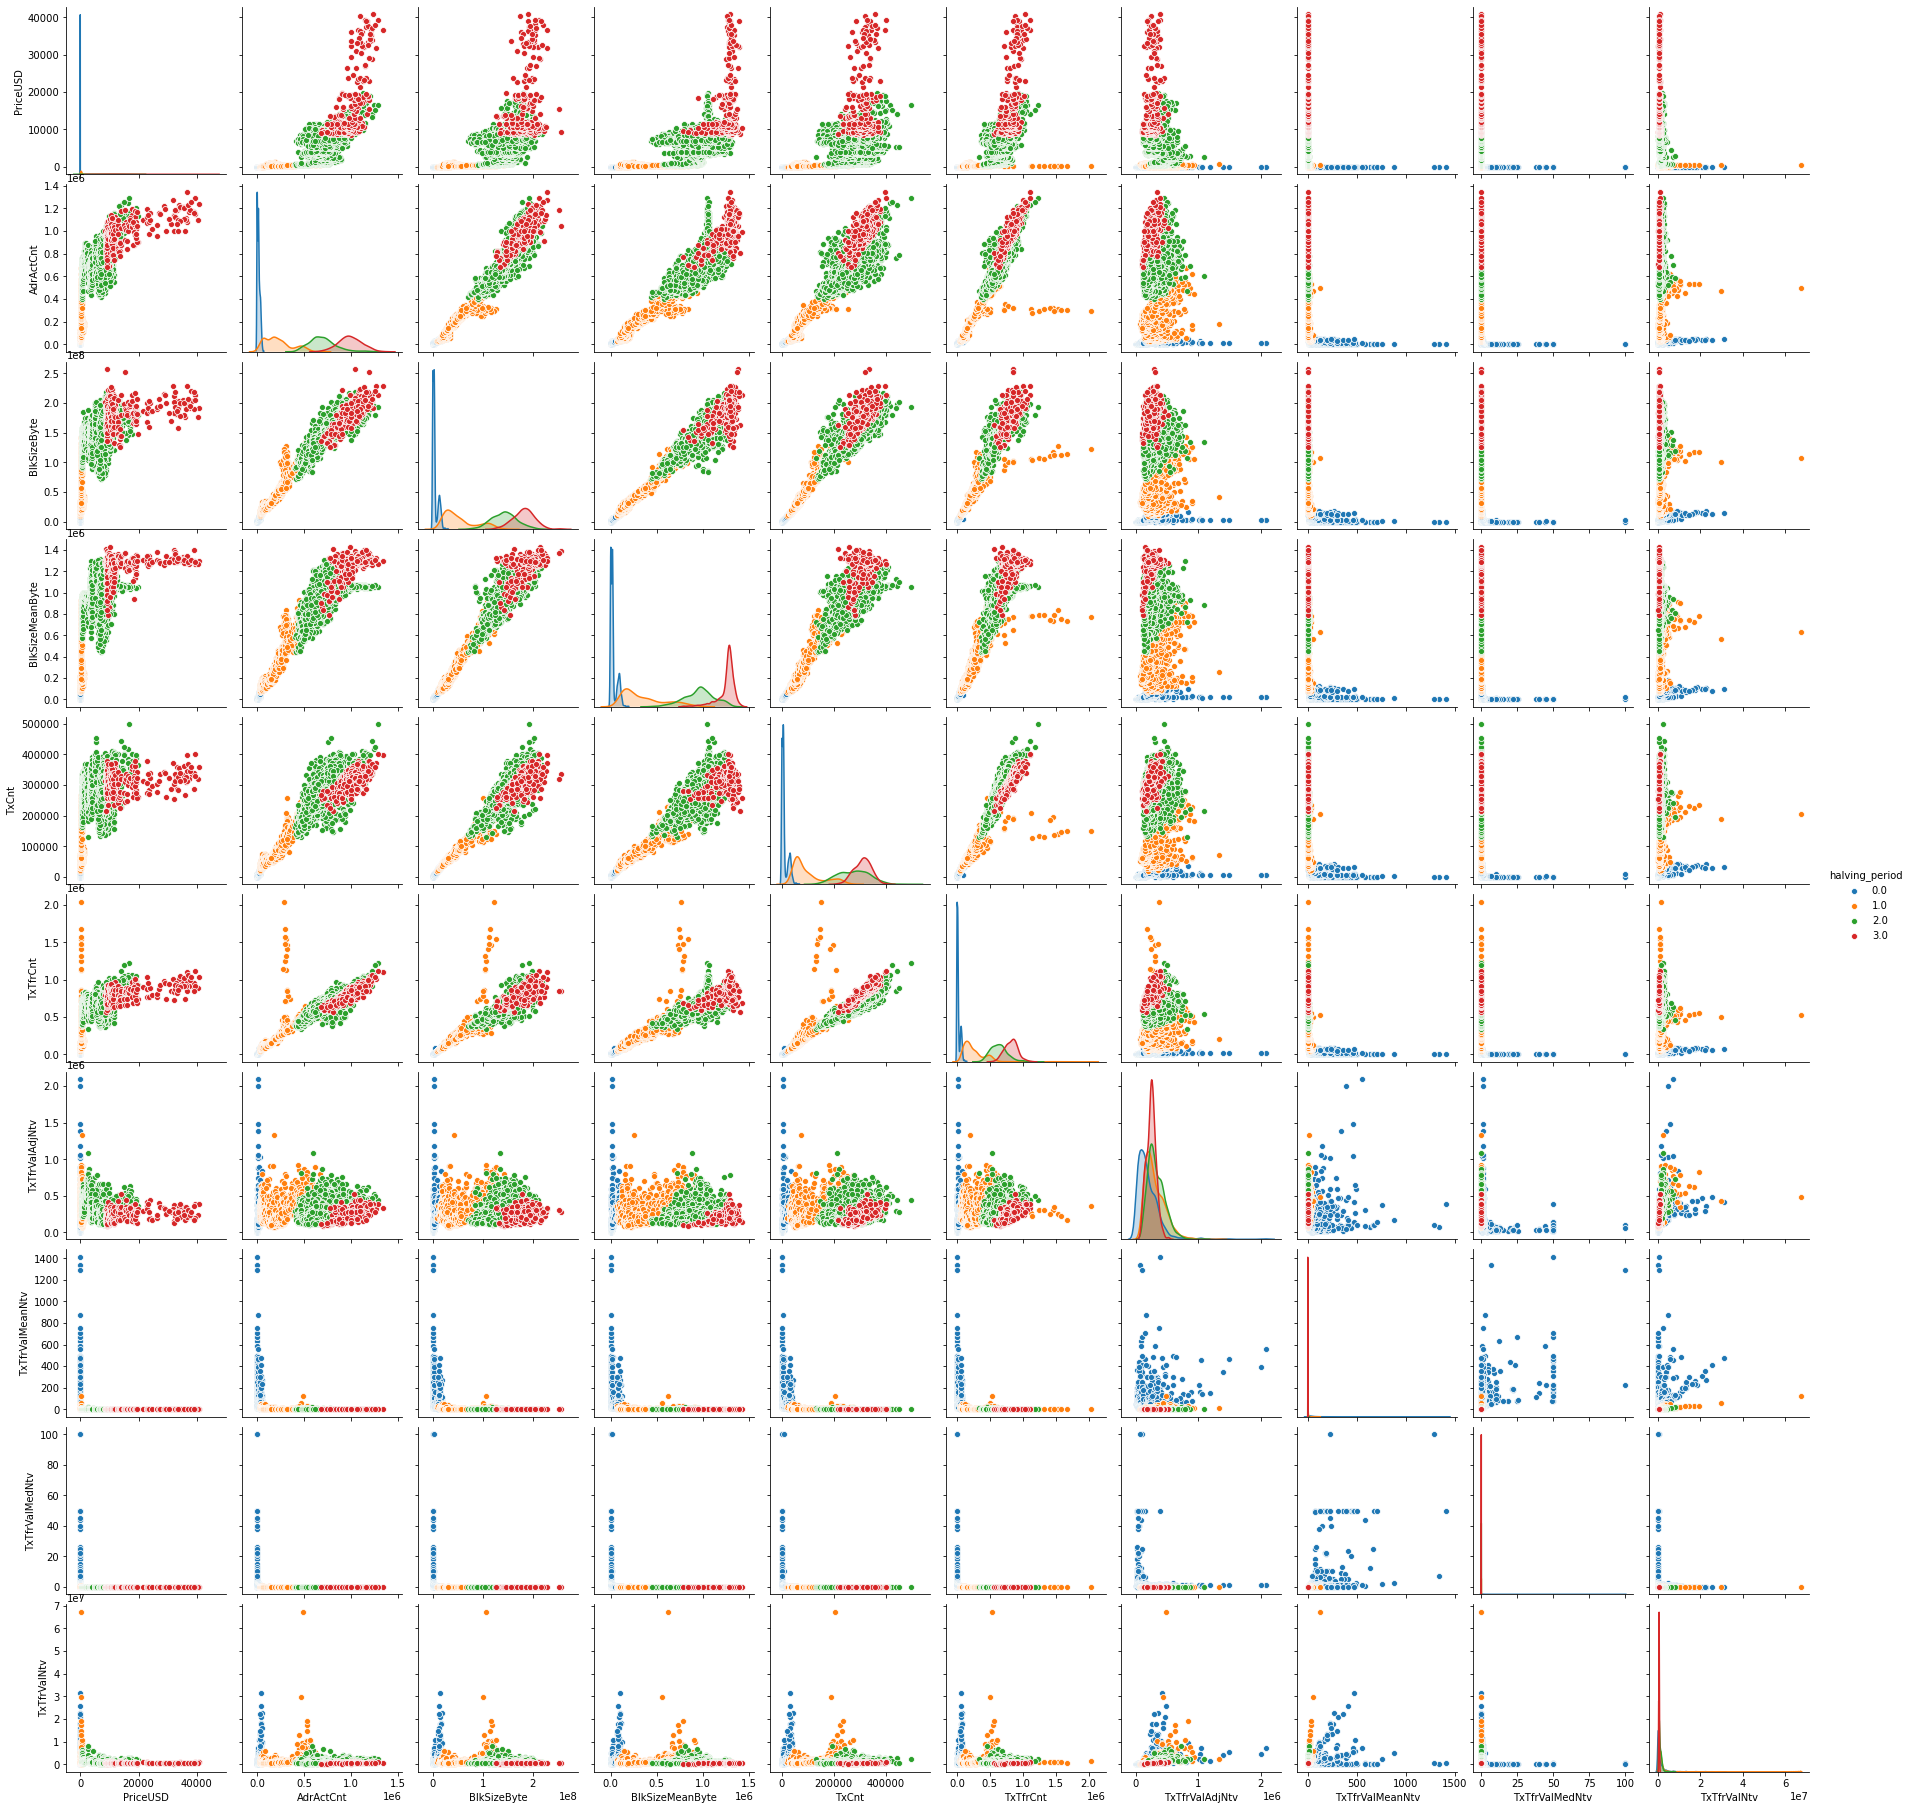

In [8]:
#to visualize correlation we construct some scatter plots.
#to better visualize all the pairs, we slice the daily dataframe by columns.

#First slice includes variables related to network usage, addresses and transactions.
first_slice_columns = ['PriceUSD', 'AdrActCnt', 'BlkSizeByte', 'BlkSizeMeanByte', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 
                       'TxTfrValMeanNtv', 'TxTfrValMedNtv', 'TxTfrValNtv', 'halving_period']

usage_df = daily[first_slice_columns]

sns.pairplot(usage_df, hue='halving_period')
plt.show()

#The scatter plots suggest the price of bitcoin may be correlated with the number of active addresses (AdrActCnt)
#in the network, the block size in terms of bytes (BlkSizeByte), the average size of the block in bytes
#('BlkSizeMeanByte'), and the number of transactions in the network (TxCnt).
#The halving period seems to have a effect on the variables as datapoints appear to be clustered by halving period.

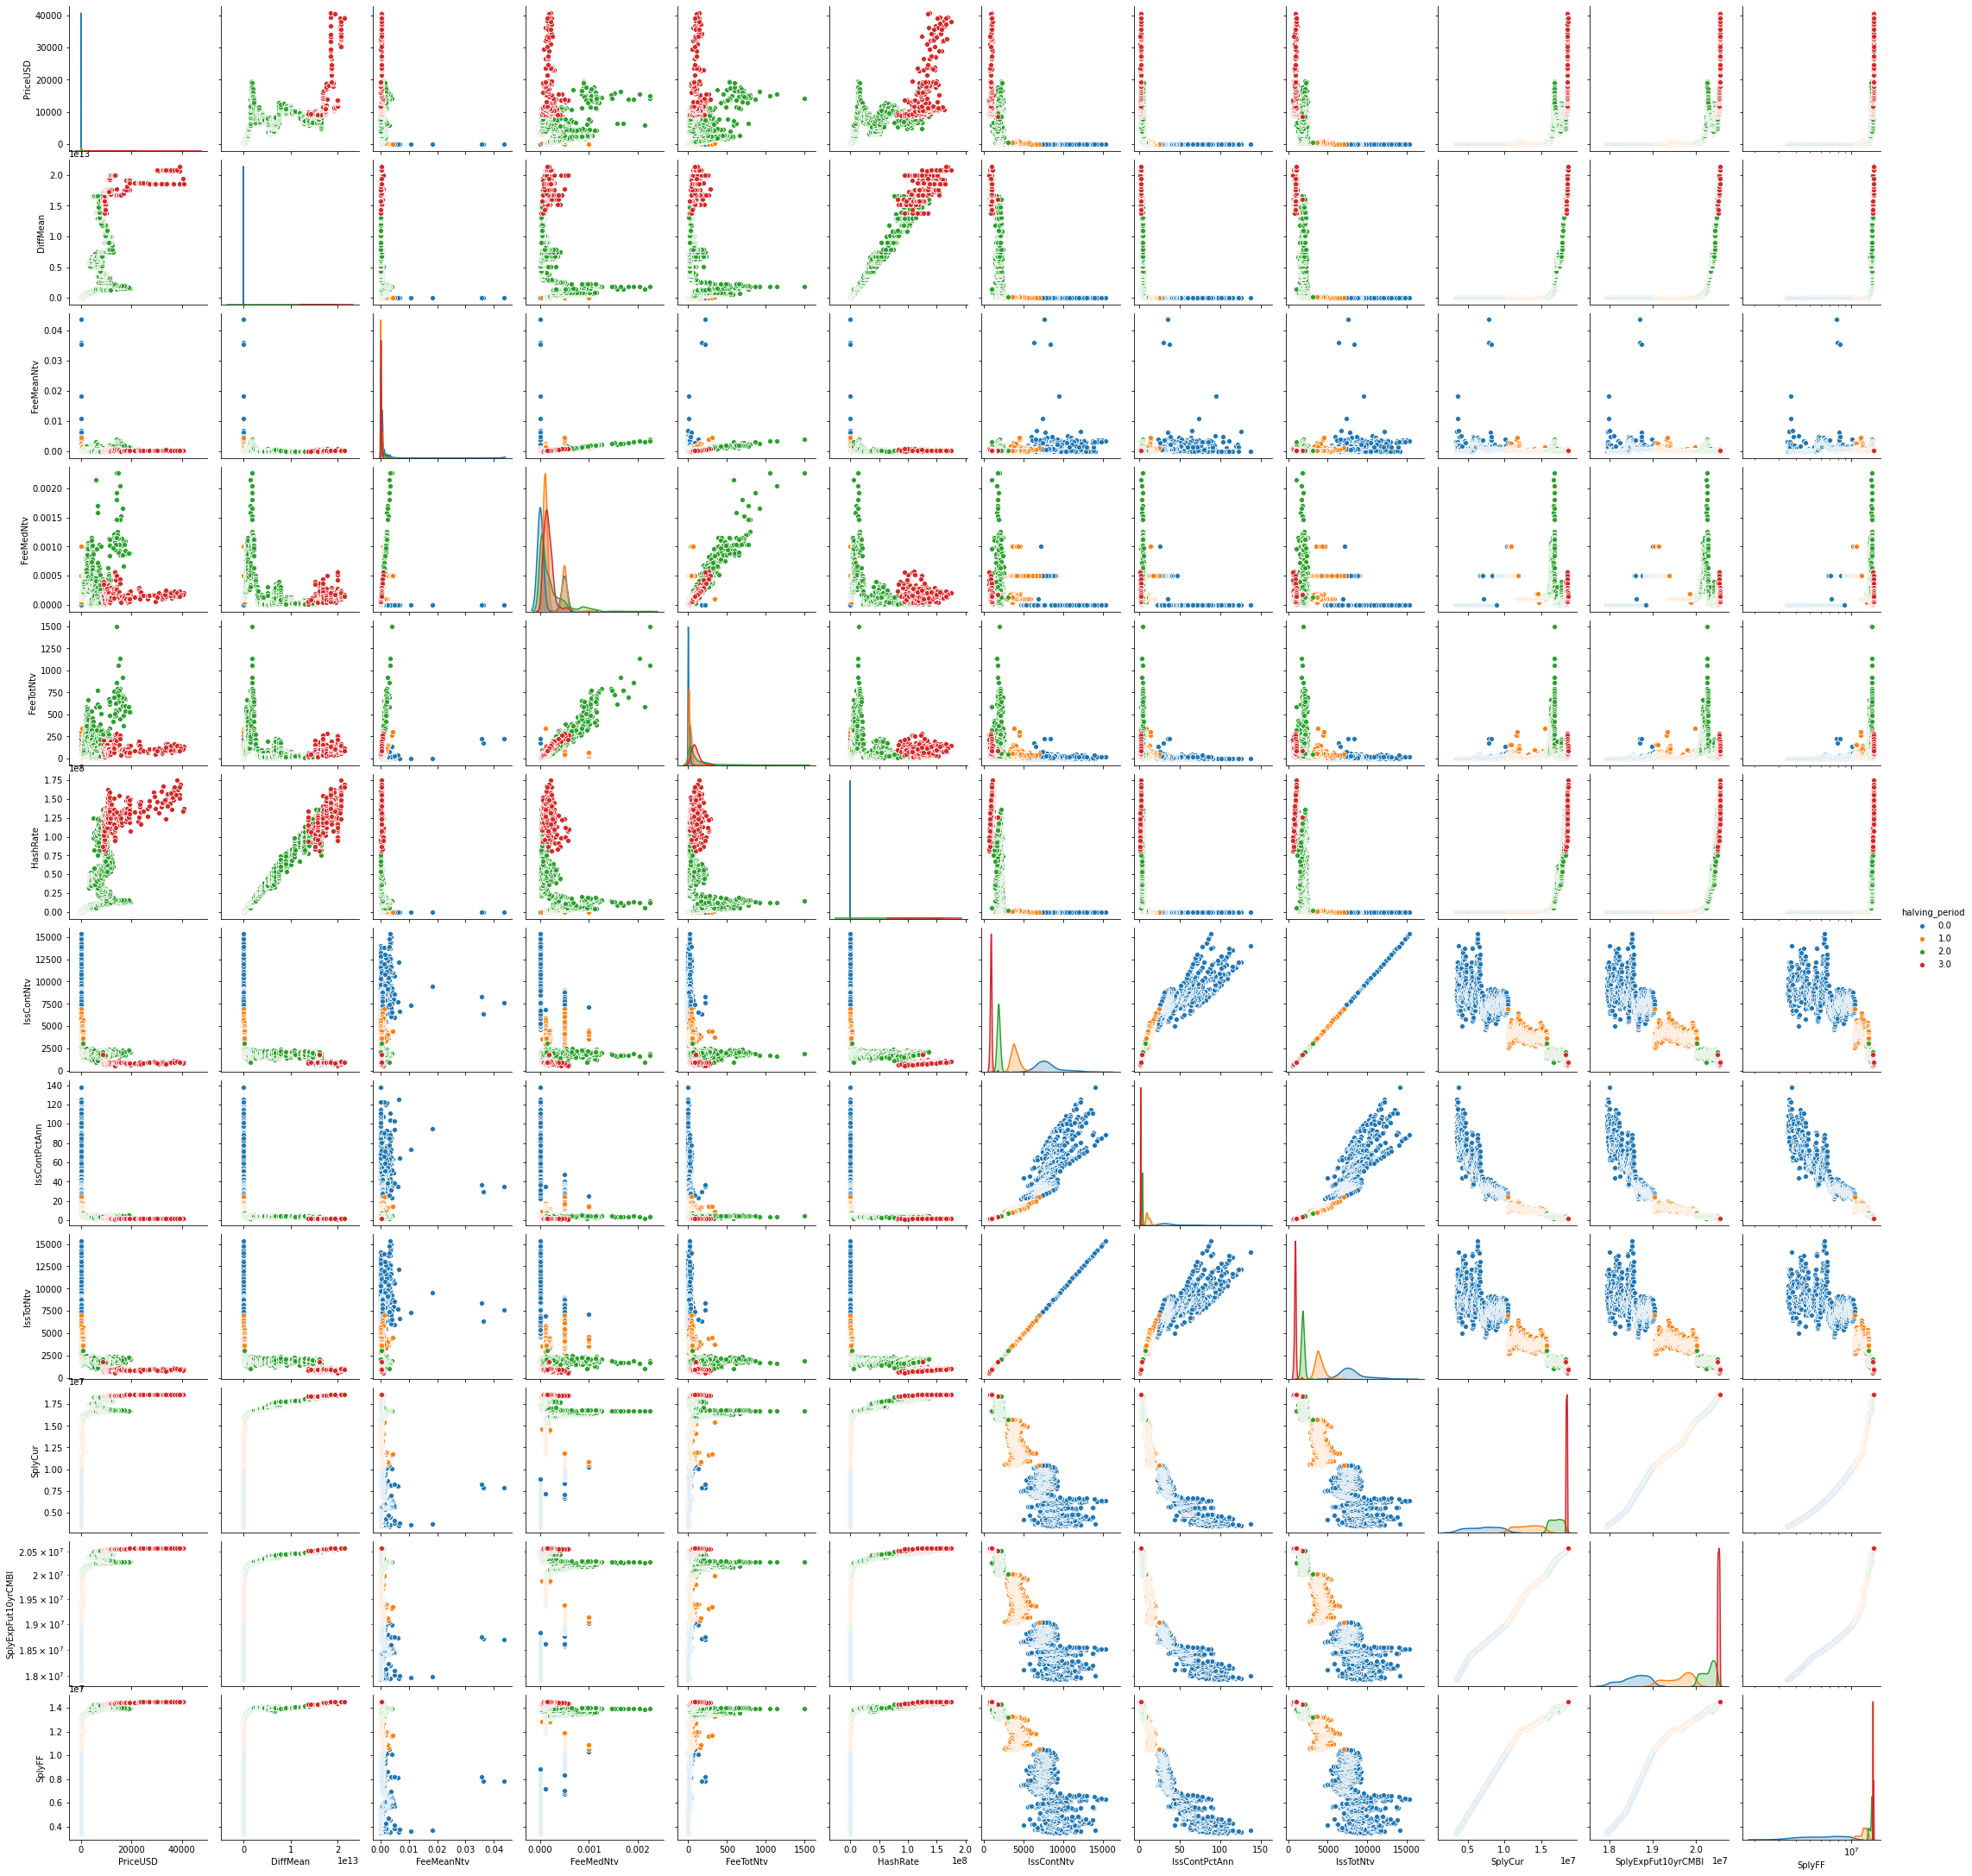

In [9]:
#Second slice includes variables related to bitcoin supply growth, fees and mining.
#halving period is used as the hue parameter to visualize the variables at different periods.
second_slice_columns = ['PriceUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMedNtv', 'FeeTotNtv', 'HashRate', 'IssContNtv',
                        'IssContPctAnn', 'IssTotNtv', 'SplyCur', 'SplyExpFut10yrCMBI', 'SplyFF', 'halving_period']

supply_df = daily[second_slice_columns]

sns.pairplot(supply_df, hue='halving_period')
plt.yscale('log')
plt.xscale('log')
plt.show()

#The plots show that the variables most correlated with price are difficulty (DiffMean), HashRate 
#(amount of work being done by miners to secure the network), and the variables that have to do with the issuance
#of new bitcoins/supply growth (IssContNtv, IssContPctAnn, IssTotNtv).
#The halving period seems to have a effect on the variables as datapoints appear to be clustered by halving period.

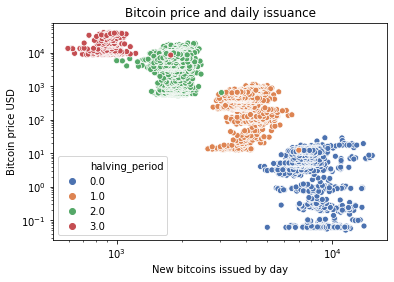

In [10]:
#To better visualize the relation between bitcoin supply growth and price, a scatter plot between price 
#and the daily issuance of new bitcoins is plotted
price_and_issuance = daily[['PriceUSD', 'IssTotNtv', 'halving_period']]
sns.scatterplot(x='IssTotNtv', y='PriceUSD', data=price_and_issuance, hue='halving_period', palette="deep")

plt.xlabel('New bitcoins issued by day')
plt.ylabel('Bitcoin price USD')
plt.title('Bitcoin price and daily issuance')
#plt.xlim(reversed(plt.xlim()))
plt.yscale('log')
plt.xscale('log')
plt.show()

#We see a correlation between the daily issuance of new bitcoins and the price, decreasing issuance and increasing
#price. Moreover, these datapoints appear to be clustered by halving period.

In [11]:
#Correlation matrix between prices and independent variables
corr_matrix = daily.corr()
price_correlation_matrix = corr_matrix.loc['PriceUSD'].sort_values(ascending=False)


'''
The matrix shows that the bitcoin price has the highest correlation with:
    - POSITIVE CORRELATION: hash rate (HashRate), average difficulty (DiffMean) and the number of addresses
        (AdrActCnt). Other variables related to network usage as number of transactions (Tx,TfrCnt, TxCnt) and
        block size (BlkSizeByte, BlkSizeMeanByte) also show a high correlation.
    NEGATIVE CORRELATION: Variables with high negative correlation with price are mostly related to
        issuance/supply growth of new bitcoins. As issuance decreases (slower growth of supply), price tends to 
        increase. These are IssTotNtv (total new bitcoins issued per day), IssContNtv and IssContPctAnn
        (annual growth of new bitcoin issued)
'''

price_correlation_matrix

PriceUSD              1.000000
HashRate              0.818412
DiffMean              0.812329
AdrActCnt             0.765846
block_height          0.713920
halving_period        0.705460
BlkSizeByte           0.695225
BlkSizeMeanByte       0.692071
TxTfrCnt              0.685816
TxCnt                 0.647345
SplyExpFut10yrCMBI    0.600330
SplyCur               0.591395
SplyFF                0.487984
FeeTotNtv             0.319690
FeeMedNtv             0.036426
TxTfrValAdjNtv       -0.004089
FeeMeanNtv           -0.080306
TxTfrValMedNtv       -0.089379
TxTfrValNtv          -0.111096
TxTfrValMeanNtv      -0.179487
IssContPctAnn        -0.379447
IssContNtv           -0.536559
IssTotNtv            -0.536559
Name: PriceUSD, dtype: float64

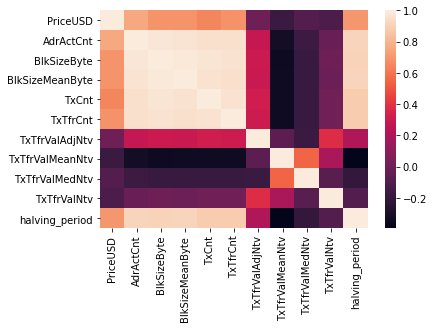

In [12]:
#heatmap of usage variables correlation matrix to visualize correlations.
sns.heatmap(usage_df.corr())
plt.show()

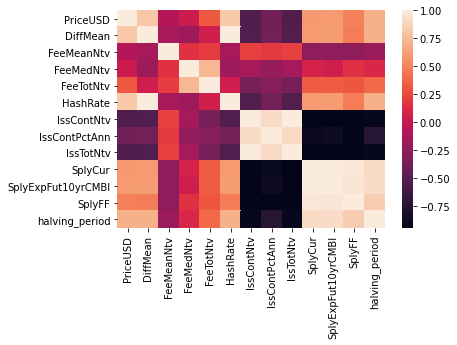

In [13]:
#heatmap of supply variables correlation matrix to visualize correlations.
sns.heatmap(supply_df.corr())
plt.show()

Conclusions.

We have identified the variables that have a higher correlation with the bitcoin price.
Some of these variables are in the network usage category: number of addresses(AdrActCnt),number of transactions (TxTfrCnt, TxCnt) and block size (BlkSizeByte, BlkSizeMeanByte).
Other variables are in the supply category: IssTotNtv (total new bitcoins issued per day), IssContNtv and IssContPctAnn (annual growth of new bitcoin issued).
Finnaly, variables related to bitcoin mining with high correlation are hash rate (HashRate) and average difficulty (DiffMean).

We have also identified that the price and these variables seem to cluster depending of the halving period we're in (halving_period variable).